<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/projet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [25]:
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/all_sites_scores.csv'
all_sites = pd.read_csv(url)

In [26]:
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/fandango_scrape.csv'
fandango = pd.read_csv(url)

In [27]:
df = pd.merge(all_sites,fandango ,on='FILM', how='inner', )

In [28]:
df

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,STARS,RATING,VOTES
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,5.0,4.5,14846
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5.0,4.5,12640
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,5.0,4.5,12055
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,5.0,4.5,1793
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,3.5,3.0,1021
...,...,...,...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,4.0,4.0,1348
141,'71 (2015),97,82,83,7.5,7.2,60,24116,3.5,3.5,192
142,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,3.5,3.5,118
143,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,3.5,3.5,59


In [29]:
# Description
df.describe().transpose()['max']

,max
RottenTomatoes,100.0
RottenTomatoes_User,94.0
Metacritic,94.0
Metacritic_User,9.6
IMDB,8.6
Metacritic_user_vote_count,2375.0
IMDB_user_vote_count,334164.0
STARS,5.0
RATING,4.8
VOTES,34846.0


In [ ]:
# Normalisation des valeurs

In [30]:
df['RT_norm'] = np.round(df['RottenTomatoes'] / 20 , 1)
df['U_norm'] = np.round(df['RottenTomatoes_User'] / 20 , 1)

In [33]:
df['M_norm'] = np.round(df['Metacritic'] / 20 , 1)
df['Mu_norm'] = np.round(df['Metacritic_User'] / 2, 1)

In [32]:
df['IMDB_norm'] = np.round(df['IMDB'] / 2 , 1)

In [34]:
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,STARS,RATING,VOTES,RT_norm,U_norm,M_norm,Mu_norm,IMDB_norm
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,5.0,4.5,14846,3.7,4.3,3.3,3.6,3.9
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5.0,4.5,12640,4.2,4.0,3.4,3.8,3.6
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,5.0,4.5,12055,4.0,4.5,3.2,4.0,3.9
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,5.0,4.5,1793,0.9,4.2,1.1,2.4,2.7
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,3.5,3.0,1021,0.7,1.4,1.4,1.7,2.6


In [35]:
df.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'STARS', 'RATING', 'VOTES', 'RT_norm', 'U_norm',
       'M_norm', 'Mu_norm', 'IMDB_norm'],
      dtype='object')

In [36]:
norm_score = df[['STARS', 'RATING', 'RT_norm', 'U_norm',
       'M_norm', 'Mu_norm', 'IMDB_norm']]

In [37]:
norm_score

,STARS,RATING,RT_norm,U_norm,M_norm,Mu_norm,IMDB_norm
0,5.0,4.5,3.7,4.3,3.3,3.6,3.9
1,5.0,4.5,4.2,4.0,3.4,3.8,3.6
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7
4,3.5,3.0,0.7,1.4,1.4,1.7,2.6
...,...,...,...,...,...,...,...
140,4.0,4.0,4.4,3.9,3.4,4.0,3.7
141,3.5,3.5,4.8,4.1,4.2,3.8,3.6
142,3.5,3.5,4.8,3.9,4.4,4.4,3.7
143,3.5,3.5,5.0,4.0,4.5,3.6,3.9


In [ ]:
# diagramme kde

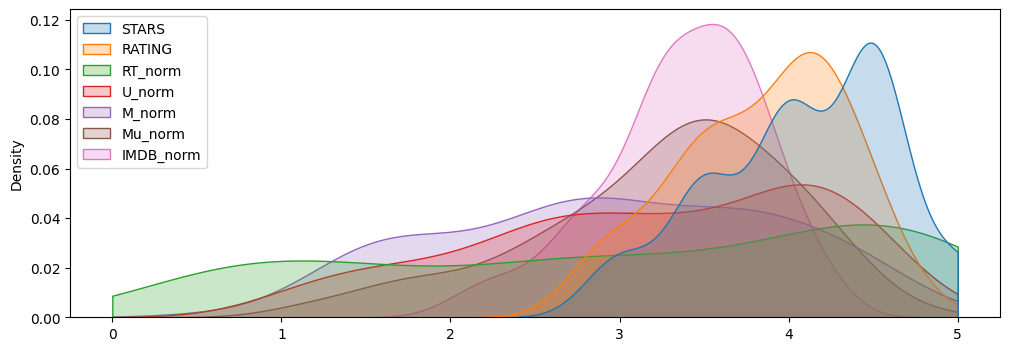

In [44]:
plt.figure(figsize=(12,4))
sns.kdeplot(norm_score, clip=(0,5), color='magma', fill=True);

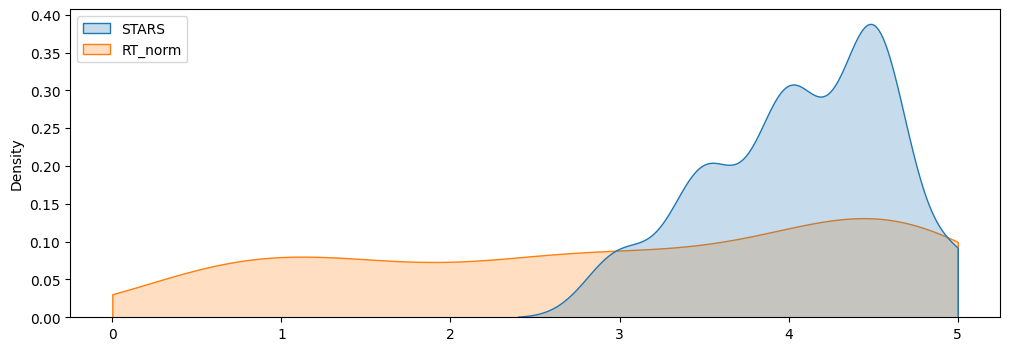

In [45]:
plt.figure(figsize=(12,4))
sns.kdeplot(norm_score[['STARS','RT_norm']], clip=(0,5), color='magma', fill=True);

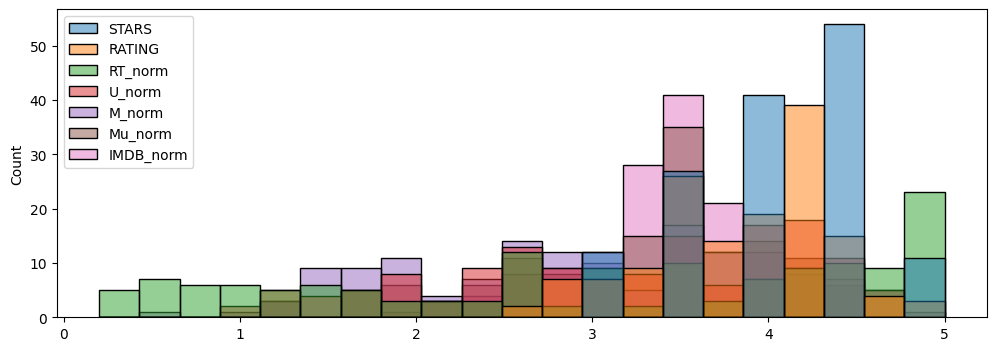

In [49]:
plt.figure(figsize=(12,4))
sns.histplot(norm_score);

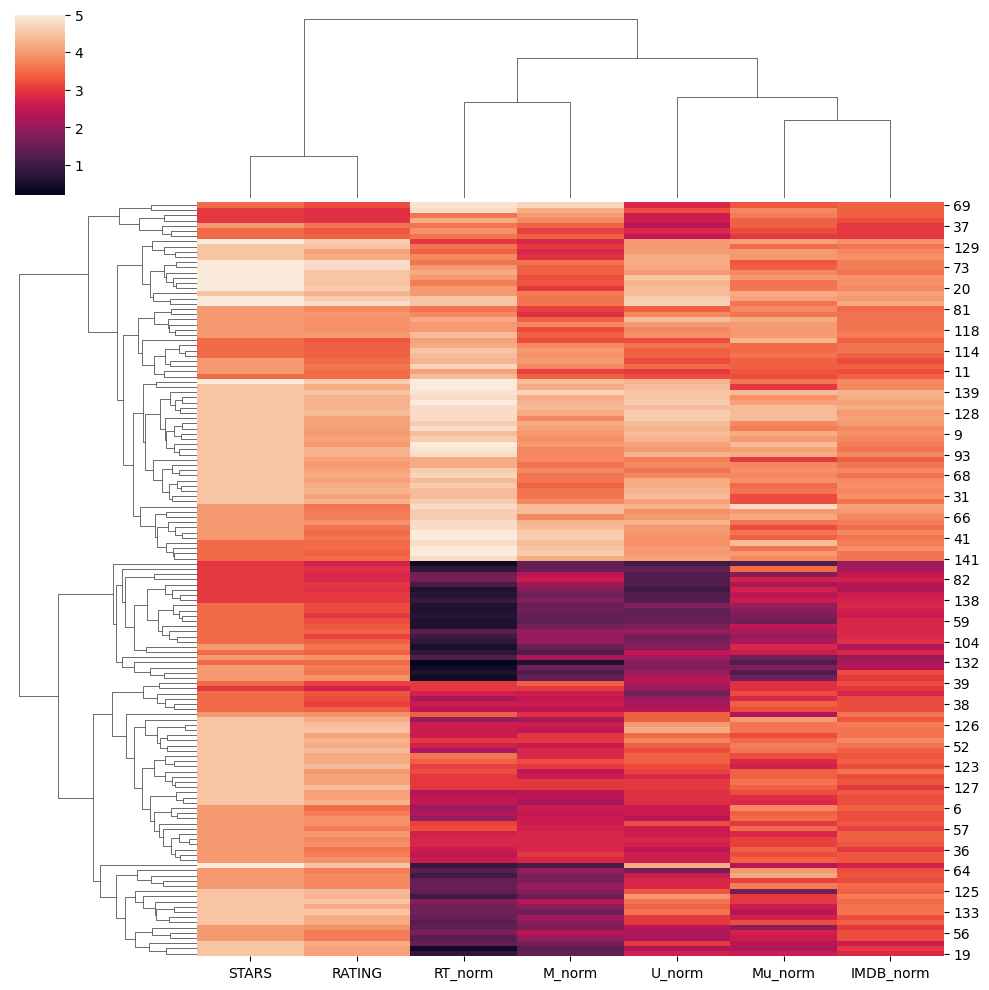

In [50]:
# carte de chaleur
sns.clustermap(norm_score, col_cluster=True,);

In [51]:
norm_score.columns

Index(['STARS', 'RATING', 'RT_norm', 'U_norm', 'M_norm', 'Mu_norm',
       'IMDB_norm'],
      dtype='object')

In [52]:
wor = df[['FILM','STARS', 'RATING', 'RT_norm', 'U_norm', 'M_norm', 'Mu_norm',
       'IMDB_norm']]

In [53]:
wor

,FILM,STARS,RATING,RT_norm,U_norm,M_norm,Mu_norm,IMDB_norm
0,Avengers: Age of Ultron (2015),5.0,4.5,3.7,4.3,3.3,3.6,3.9
1,Cinderella (2015),5.0,4.5,4.2,4.0,3.4,3.8,3.6
2,Ant-Man (2015),5.0,4.5,4.0,4.5,3.2,4.0,3.9
3,Do You Believe? (2015),5.0,4.5,0.9,4.2,1.1,2.4,2.7
4,Hot Tub Time Machine 2 (2015),3.5,3.0,0.7,1.4,1.4,1.7,2.6
...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),4.0,4.0,4.4,3.9,3.4,4.0,3.7
141,'71 (2015),3.5,3.5,4.8,4.1,4.2,3.8,3.6
142,"Two Days, One Night (2014)",3.5,3.5,4.8,3.9,4.4,4.4,3.7
143,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,5.0,4.0,4.5,3.6,3.9


In [55]:
wor.nsmallest(10,'RT_norm')

,FILM,STARS,RATING,RT_norm,U_norm,M_norm,Mu_norm,IMDB_norm
132,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
15,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
48,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
53,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
105,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
33,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
35,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
58,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
59,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
60,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


from matplotlib import pyplot as plt
_df_0['STARS'].plot(kind='hist', bins=20, title='STARS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['RATING'].plot(kind='hist', bins=20, title='RATING')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['RT_norm'].plot(kind='hist', bins=20, title='RT_norm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['U_norm'].plot(kind='hist', bins=20, title='U_norm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='STARS', y='RATING', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='RATING', y='RT_norm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='RT_norm', y='U_norm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='U_norm', y='M_norm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RT_norm']
  ys = series['STARS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('RT_norm', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RT_norm')
_ = plt.ylabel('STARS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RT_norm']
  ys = series['RATING']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('RT_norm', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RT_norm')
_ = plt.ylabel('RATING')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RT_norm']
  ys = series['U_norm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('RT_norm', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RT_norm')
_ = plt.ylabel('U_norm')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RT_norm']
  ys = series['M_norm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('RT_norm', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RT_norm')
_ = plt.ylabel('M_norm')

from matplotlib import pyplot as plt
_df_12['STARS'].plot(kind='line', figsize=(8, 4), title='STARS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['RATING'].plot(kind='line', figsize=(8, 4), title='RATING')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['RT_norm'].plot(kind='line', figsize=(8, 4), title='RT_norm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['U_norm'].plot(kind='line', figsize=(8, 4), title='U_norm')
plt.gca().spines[['top', 'right']].set_visible(False)